In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
df = pd.read_csv("brexit_full.csv")
pd.options.display.max_columns = None

In [41]:
df.head()

,Area_Code,Area,Region_Code,Region,Valid_Votes,Remain,Leave,Pct_Remain,Pct_Leave,Leave? (derived cell),Urban / Rural,% degree educated and higher,% 18+ in FTE,% non-British,% identifying as white,% identifying as non-white (derived cell),Median Age,% Unemployed,GVA 2015,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,E06000001,Hartlepool,E12000001,North East,46100,14029,32071,30.43,69.57,Leave,Predominantly Urban,17.6,3.2,2.17%,97.6,2.4,41.8,4.7,15777,NaN,Rural local authorities,Leave,77.0
1,E06000002,Middlesbrough,E12000001,North East,61358,21181,40177,34.52,65.48,Leave,Predominantly Urban,18.5,7.6,7.19%,88.1,11.9,36.4,4.7,18540,NaN,NaN,Remain,14.0
2,E06000003,Redcar and Cleveland,E12000001,North East,72714,24586,48128,33.81,66.19,Leave,Urban with Significant Rural,18.9,3.0,0.75%,98.5,1.5,44.7,3.8,15188,NaN,Mixed local authorities,Leave,43.0
3,E06000004,Stockton-on-Tees,E12000001,North East,100415,38433,61982,38.27,61.73,Leave,Predominantly Urban,22.8,4.4,3.13%,94.5,5.5,40.3,3.1,20257,NaN,NaN,Remain,11.0
4,E06000005,Darlington,E12000001,North East,55166,24172,30994,43.82,56.18,Leave,Predominantly Urban,23.7,2.6,5.77%,95.9,4.1,42.7,3.1,24585,NaN,Urban local authorities,Leave,126.0


In [55]:
df_london = df[df.Region == "London"]

In [56]:
df_london

,Area_Code,Area,Region_Code,Region,Valid_Votes,Remain,Leave,Pct_Remain,Pct_Leave,Leave? (derived cell),Urban / Rural,% degree educated and higher,% 18+ in FTE,% non-British,% identifying as white,% identifying as non-white (derived cell),Median Age,% Unemployed,GVA 2015,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
293,E09000001,City of London,E12000007,London,4399,3312,1087,75.29,24.71,Remain,Predominantly Urban,68.4,6.2,32.93%,78.6,21.4,38.7,0.9,5333112,NaN,NaN,NaN,NaN
294,E09000002,Barking and Dagenham,E12000007,London,73880,27750,46130,37.56,62.44,Leave,Predominantly Urban,20.9,7.2,22.44%,58.2,41.8,32.1,2.5,16514,NaN,NaN,NaN,NaN
295,E09000003,Barnet,E12000007,London,161033,100210,60823,62.23,37.77,Remain,Predominantly Urban,40.3,7.3,23.36%,64.1,35.9,36.3,1.5,24760,NaN,NaN,NaN,NaN
296,E09000004,Bexley,E12000007,London,128489,47603,80886,37.05,62.95,Leave,Predominantly Urban,21.8,4.5,11.16%,81.6,18.4,38.6,1.3,21255,NaN,NaN,NaN,NaN
297,E09000005,Brent,E12000007,London,121404,72523,48881,59.74,40.26,Remain,Predominantly Urban,33.3,9.1,32.00%,36.2,63.8,34.6,2.3,24630,NaN,NaN,NaN,NaN
298,E09000006,Bromley,E12000007,London,182432,92398,90034,50.65,49.35,Remain,Predominantly Urban,33.1,3.4,12.04%,84.1,15.9,40.5,1.0,21907,NaN,NaN,NaN,NaN
299,E09000007,Camden,E12000007,London,95133,71295,23838,74.94,25.06,Remain,Predominantly Urban,50.5,13.6,23.97%,66.2,33.8,34.0,1.6,109694,NaN,NaN,NaN,NaN
300,E09000008,Croydon,E12000007,London,171134,92913,78221,54.29,45.71,Remain,Predominantly Urban,31.8,5.9,18.21%,55.0,45.0,36.8,1.6,19481,NaN,NaN,NaN,NaN
301,E09000009,Ealing,E12000007,London,149041,90024,59017,60.40,39.60,Remain,Predominantly Urban,37.0,7.6,32.94%,48.9,51.1,35.9,2.2,26465,NaN,NaN,NaN,NaN
302,E09000010,Enfield,E12000007,London,136906,76425,60481,55.82,44.18,Remain,Predominantly Urban,28.7,7.0,19.45%,60.9,39.1,35.5,2.2,20091,NaN,NaN,NaN,NaN


In [57]:
# remove empty "Unnamed.." columns
df_london = df_london[df_london.columns.drop(list(df_london.filter(regex='Unnamed')))]


In [59]:
df_london.head()

,Area_Code,Area,Region_Code,Region,Valid_Votes,Remain,Leave,Pct_Remain,Pct_Leave,Leave? (derived cell),Urban / Rural,% degree educated and higher,% 18+ in FTE,% non-British,% identifying as white,% identifying as non-white (derived cell),Median Age,% Unemployed,GVA 2015
293,E09000001,City of London,E12000007,London,4399,3312,1087,75.29,24.71,Remain,Predominantly Urban,68.4,6.2,32.93,78.6,21.4,38.7,0.9,5333112
294,E09000002,Barking and Dagenham,E12000007,London,73880,27750,46130,37.56,62.44,Leave,Predominantly Urban,20.9,7.2,22.44,58.2,41.8,32.1,2.5,16514
295,E09000003,Barnet,E12000007,London,161033,100210,60823,62.23,37.77,Remain,Predominantly Urban,40.3,7.3,23.36,64.1,35.9,36.3,1.5,24760
296,E09000004,Bexley,E12000007,London,128489,47603,80886,37.05,62.95,Leave,Predominantly Urban,21.8,4.5,11.16,81.6,18.4,38.6,1.3,21255
297,E09000005,Brent,E12000007,London,121404,72523,48881,59.74,40.26,Remain,Predominantly Urban,33.3,9.1,32.00,36.2,63.8,34.6,2.3,24630


In [50]:
def fixColumn(x):
    x = str(x)
    try:
        x = float(x[:-1])
    except:
        return np.nan
    return x

In [58]:
df_london["% non-British"] = df_london["% non-British"].apply(fixColumn)

/home/kyran/workspace/.virtualenvs/viz/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [39]:
df.dtypes

Area_Code                                     object
Area                                          object
Region_Code                                   object
Region                                        object
Valid_Votes                                    int64
Remain                                         int64
Leave                                          int64
Pct_Remain                                   float64
Pct_Leave                                    float64
Leave? (derived cell)                         object
Urban / Rural                                 object
% degree educated and higher                 float64
% 18+ in FTE                                 float64
% non-British                                float64
% identifying as white                       float64
% identifying as non-white (derived cell)    float64
Median Age                                   float64
% Unemployed                                 float64
GVA 2015                                      

/home/kyran/workspace/.virtualenvs/viz/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



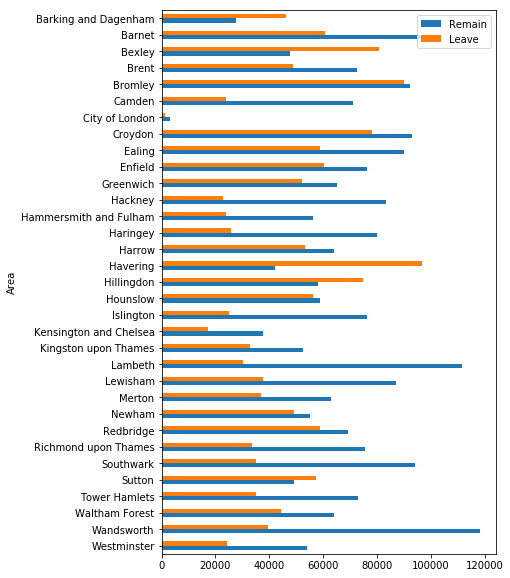

In [18]:
df_london.sort_values(by="Area", ascending=False).plot(x="Area", y=["Remain", "Leave"], kind="barh", figsize=(6, 10), sort_columns=True)

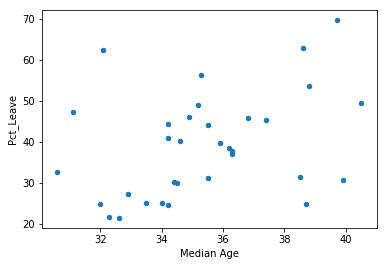

In [60]:
df_london.plot(x="Median Age", y="Pct_Leave", kind="scatter")

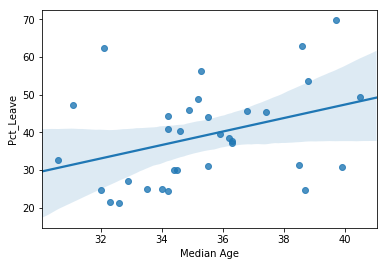

In [61]:
sns.regplot(df_london["Median Age"], df_london["Pct_Leave"])

In [21]:
#import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [22]:
df_london = df_london.sort_values(by="Area", ascending=False)

remain = go.Bar(y=df_london["Area"], x=df_london["Remain"], orientation="h", name="Remain")
leave = go.Bar(y=df_london["Area"], x=df_london["Leave"], orientation="h", name="Leave")

layout = go.Layout(
    barmode='group',
    width=600,
    height=800,
    margin=dict(l=150)
)

fig = go.Figure(data=[remain, leave], layout=layout)
iplot(fig, filename='brexit-grouped-bar')

In [23]:
embed_string = plot(fig, output_type='div', include_plotlyjs="cdn")

In [24]:
print(embed_string)

<div>
        
                <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>    
            <div id="6f2fcf2c-12f4-498f-bff7-7a189cdd5cb0" class="plotly-graph-div" style="height:800px; width:600px;"></div>
            <script type="text/javascript">
                
                    window.PLOTLYENV=window.PLOTLYENV || {};
                    window.PLOTLYENV.BASE_URL='https://plot.ly';
                    
                if (document.getElementById("6f2fcf2c-12f4-498f-bff7-7a189cdd5cb0")) {
                    Plotly.newPlot(
                        '6f2fcf2c-12f4-498f-bff7-7a189cdd5cb0',
                        [{"name": "Remain", "orientation": "h", "type": "bar", "uid": "b1833fdb-e50e-4448-aada-50441b8b078b", "x": [53928, 118463, 64156, 73011, 49319, 94293, 75396, 69213, 55328, 63003, 86955, 111584, 52533, 37601, 76420, 58755, 58040, 42201, 64042, 79991, 56188, 83

In [26]:
df_london.to_json("London_brexit_data.json", orient="records")

In [27]:
pwd

'/home/kyran/workspace/programming/github/kgd/website-2/static/talks/ucl2019/brexit-ipython'